In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

places_df = {}
train_data_df = pd.read_csv('./Dataset/train.csv')
test_data_df = pd.read_csv('./Dataset/test.csv')
# train_data_df = pd.read_csv('./Dataset/test.csv')

In [26]:
all = len(train_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date','monthly_rent']
# attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(train_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 18/ 30000
floor_area_sqm: 145/ 30000
furnished: 1/ 30000
lease_commence_date: 54/ 30000


In [27]:
all = len(test_data_df)
attributes = ['flat_model','floor_area_sqm','furnished','lease_commence_date']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(test_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

flat_model: 18/ 30000
floor_area_sqm: 145/ 30000
furnished: 1/ 30000
lease_commence_date: 54/ 30000


In [28]:
def visual_train_data():
    plt.figure(figsize=(15, 10))
    plt.scatter(train_data_df['latitude'], train_data_df['longitude'], c=train_data_df['monthly_rent'], cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Price distribution')
    plt.savefig('visual_train_data_latlng.png')
    plt.show()

visual_train_data()

KeyError: 'monthly_rent'

<Figure size 1500x1000 with 0 Axes>

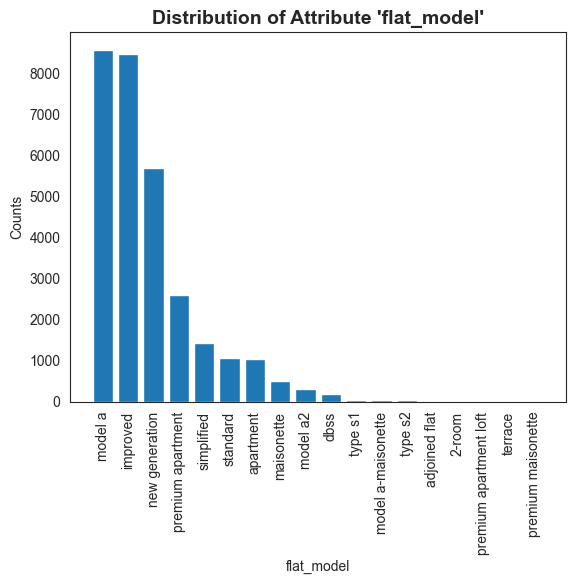

<Figure size 640x480 with 0 Axes>

In [29]:
train_data_df['flat_model'] = train_data_df['flat_model'].str.lower()
counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('flat_model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_flat_model.png')

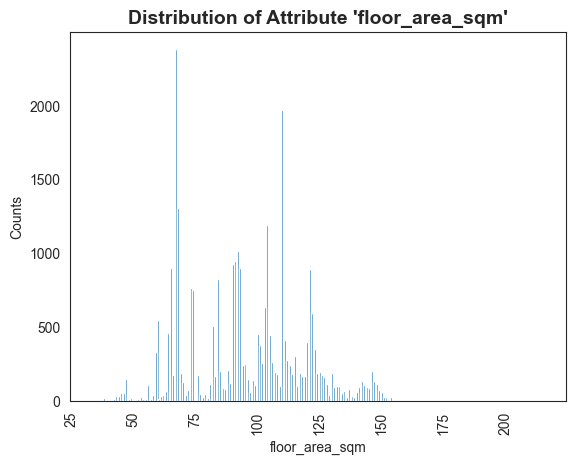

<Figure size 640x480 with 0 Axes>

In [30]:
counts = train_data_df['floor_area_sqm'].value_counts()
counts = counts.reset_index()
counts.columns = ['floor_area_sqm', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.floor_area_sqm, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('floor_area_sqm') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'floor_area_sqm\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_floor_area_sqm.png')

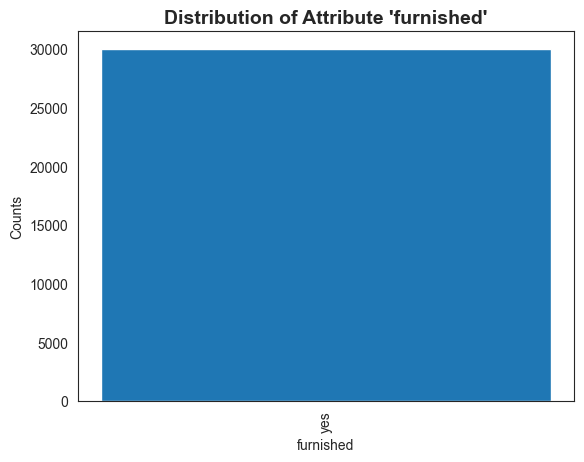

<Figure size 640x480 with 0 Axes>

In [31]:
train_data_df['furnished'] = train_data_df['furnished'].str.lower()
counts = train_data_df['furnished'].value_counts()
counts = counts.reset_index()
counts.columns = ['furnished', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.furnished, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('furnished') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'furnished\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_furnished.png')

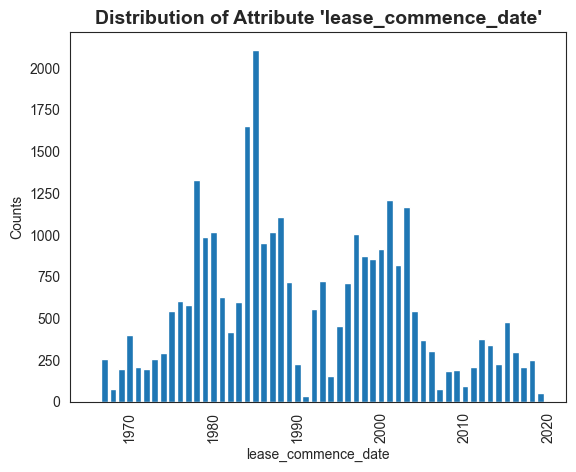

<Figure size 640x480 with 0 Axes>

In [32]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('lease_commence_date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_lease_commence_date.png')

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

unique_values = train_data_df['monthly_rent'].value_counts().reset_index()
unique_values.columns = ['monthly_rent', 'counts']
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图形大小
plt.bar(unique_values.monthly_rent, unique_values.counts, width=20)  # 调整宽度
ax.set_xlabel('monthly_rent')
ax.set_ylabel('counts')
ax.set_title('monthly_rent', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()
plt.savefig('visual_train_monthly_rent.png')


KeyError: 'monthly_rent'

In [34]:
import pandas as pd
missing_values = train_data_df.isnull().sum()
print(missing_values)


rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
dtype: int64


There are 0 numerical features with skewness > 0.5 :



Series([], dtype: float64)

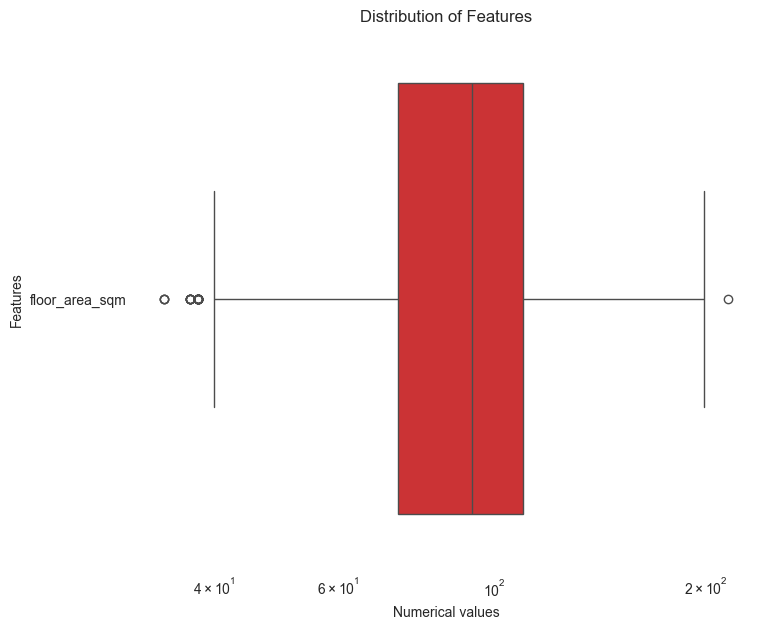

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats

# List all numerical features
numerical_features = ['floor_area_sqm']
# Boxplot to visualize the skewness of the numerical features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=train_data_df[numerical_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Features")
ax.set(xlabel="Numerical values")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)
# Check skewness of all features
skewness = train_data_df[numerical_features].apply(lambda x: skew(x))

high_skewed = skewness[abs(skewness) > 0.5]

print("There are {} numerical features with skewness > 0.5 :\n".format(high_skewed.shape[0]))
high_skewed

In [36]:
duplicates = train_data_df[train_data_df.duplicated()]
print('There are {} duplicate records in the dataset'.format(duplicates.shape[0]))

There are 955 duplicate records in the dataset


In [37]:
train_data_df = train_data_df.drop_duplicates(ignore_index=True)
print('After dropping duplicate data, the training dataset now has {} rows'.format(train_data_df.shape[0]))
train_data_df.head()

After dropping duplicate data, the training dataset now has 29045 rows


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


In [38]:
train_data_df = pd.get_dummies(train_data_df, columns=['furnished'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,furnished_yes
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,True
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,True
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,True
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,True
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,True


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data_df['flat_model'] = label_encoder.fit_transform(train_data_df['flat_model'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,furnished_yes
0,2023-01,hougang,245,hougang street 22,5-room,4,121.0,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,True
1,2022-09,sembawang,316,sembawang vista,4-room,6,100.0,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,True
2,2023-07,clementi,708,Clementi West Street 2,4-room,9,91.0,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,True
3,2021-08,jurong east,351,Jurong East Street 31,3 room,6,74.0,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,True
4,2022-03,jurong east,305,jurong east street 32,5-room,4,121.0,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,True


In [40]:
train_data_df['lease_commence_date'] = train_data_df['lease_commence_date'].apply(str)
label_encoder = LabelEncoder()
train_data_df['lease_commence_date'] = label_encoder.fit_transform(train_data_df['lease_commence_date'])
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,furnished_yes
0,2023-01,hougang,245,hougang street 22,5-room,4,121.0,18,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,True
1,2022-09,sembawang,316,sembawang vista,4-room,6,100.0,33,1.446343,103.820817,0.0,sembawang central,sembawang,north region,True
2,2023-07,clementi,708,Clementi West Street 2,4-room,9,91.0,14,1.305719,103.762168,0.0,clementi west,clementi,west region,True
3,2021-08,jurong east,351,Jurong East Street 31,3 room,6,74.0,20,1.344832,103.730778,0.0,yuhua west,jurong east,west region,True
4,2022-03,jurong east,305,jurong east street 32,5-room,4,121.0,17,1.345437,103.735241,0.0,yuhua west,jurong east,west region,True


In [41]:
train_data_df.dtypes
train_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,furnished_yes
0,2023-01,hougang,245,hougang street 22,5-room,4,121.0,18,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,True
1,2022-09,sembawang,316,sembawang vista,4-room,6,100.0,33,1.446343,103.820817,0.0,sembawang central,sembawang,north region,True
2,2023-07,clementi,708,Clementi West Street 2,4-room,9,91.0,14,1.305719,103.762168,0.0,clementi west,clementi,west region,True
3,2021-08,jurong east,351,Jurong East Street 31,3 room,6,74.0,20,1.344832,103.730778,0.0,yuhua west,jurong east,west region,True
4,2022-03,jurong east,305,jurong east street 32,5-room,4,121.0,17,1.345437,103.735241,0.0,yuhua west,jurong east,west region,True


In [20]:
train_data_df.to_csv('processed_data.csv', index=False)

In [42]:
train_data_df[['flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/train_2.csv")
# train_data_df[['flat_model', 'floor_area_sqm', 'lease_commence_date']].to_csv("./preprocessed/test_2.csv")

In [44]:
train_data_df

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,furnished_yes
0,2023-01,hougang,245,hougang street 22,5-room,4,121.0,18,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,True
1,2022-09,sembawang,316,sembawang vista,4-room,6,100.0,33,1.446343,103.820817,0.0,sembawang central,sembawang,north region,True
2,2023-07,clementi,708,Clementi West Street 2,4-room,9,91.0,14,1.305719,103.762168,0.0,clementi west,clementi,west region,True
3,2021-08,jurong east,351,Jurong East Street 31,3 room,6,74.0,20,1.344832,103.730778,0.0,yuhua west,jurong east,west region,True
4,2022-03,jurong east,305,jurong east street 32,5-room,4,121.0,17,1.345437,103.735241,0.0,yuhua west,jurong east,west region,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,2022-08,punggol,615b,edgefield plains,4-room,6,92.0,46,1.403746,103.909883,0.0,waterway east,punggol,north-east region,True
29041,2023-02,sembawang,491,admiralty link,4-room,6,90.0,38,1.456113,103.817717,0.0,sembawang north,sembawang,north region,True
29042,2023-05,ang mo kio,524,ang mo kio avenue 5,3-room,9,68.0,14,1.373378,103.853043,0.0,cheng san,ang mo kio,north-east region,True
29043,2023-02,woodlands,656,woodlands ring road,executive,5,144.0,32,1.436986,103.799118,0.0,woodlands east,woodlands,north region,True
